# Analysis of the Hotdog classifier

Here we will analyze the results of the hotdog classifier.

In [1]:
import os
if os.getcwd().split("/")[-1] != "hotdog":
    os.chdir('/work3/s183920/02514-DLCI/02514-Deep-Learning-In-Computer-Vision/hotdog/')

from classifier import HotdogClassifier
from utils import data_to_img_array, inverse_normalize
import torch

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


# create classifier
# model = "Resnet18"
# trained_model = "wandb:deepcomputer/HotdogModels/Resnet_finetune_model:v9"
model = "SimpleCNN"
trained_model = "wandb:deepcomputer/grid_search/run_2023-06-07_10-14-16_model:v8"
classifier = HotdogClassifier(model = model, use_wandb=False)
classifier.load_model(trained_model)

/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/work3/s183920/02514-DLCI/DLCI-venv/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Setting model to SimpleCNN
Loading model from wandb:deepcomputer/grid_search/run_2023-06-07_10-14-16_model:v8


wandb: Downloading large artifact run_2023-06-07_10-14-16_model:v8, 64.99MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.2


## The dataset

### Label distribution

Below we see that the dataset seems rather balanced. There are slightly more hotdog images than not hotdog images in the train and validation sets. The test set is the other way around.

In [7]:
total_labels = classifier.data_train.targets

train_idx = classifier.train_loader.dataset.indices
train_labels = [classifier.train_loader.dataset.dataset.targets[i] for i in train_idx]

val_idx = classifier.val_loader.dataset.indices
val_labels = [classifier.val_loader.dataset.dataset.targets[i] for i in val_idx]

test_labels = classifier.test_loader.dataset.targets

print("Train total: ", len(total_labels))
print("Train total not hotdogs: ", sum(total_labels), f"({np.round(sum(total_labels)/len(total_labels)*100, 2)} %)")
print("Train total hotdogs: ", len(total_labels)-sum(total_labels), f"({np.round((1-sum(total_labels)/len(total_labels))*100, 2)} %)")
print()
print("Train: ", len(train_labels))
print("Train not hotdogs: ", sum(train_labels), f"({np.round(sum(train_labels)/len(train_labels)*100, 2)} %)")
print("Train hotdogs: ", len(train_labels)-sum(train_labels), f"({np.round((1-sum(train_labels)/len(train_labels))*100, 2)} %)")
print()
print("Val: ", len(val_labels))
print("Val not hotdogs: ", sum(val_labels), f"({np.round(sum(val_labels)/len(val_labels)*100, 2)} %)")
print("Val hotdogs: ", len(val_labels)-sum(val_labels), f"({np.round((1-sum(val_labels)/len(val_labels))*100, 2)} %)")
print()
print("Test: ", len(test_labels))
print("Test not hotdogs: ", sum(test_labels), f"({np.round(sum(test_labels)/len(test_labels)*100, 2)} %)")
print("Test hotdogs: ", len(test_labels)-sum(test_labels), f"({np.round((1-sum(test_labels)/len(test_labels))*100, 2)} %)")

Train total:  2047
Train total not hotdogs:  972 (47.48 %)
Train total hotdogs:  1075 (52.52 %)

Train:  1638
Train not hotdogs:  770 (47.01 %)
Train hotdogs:  868 (52.99 %)

Val:  409
Val not hotdogs:  202 (49.39 %)
Val hotdogs:  207 (50.61 %)

Test:  1862
Test not hotdogs:  967 (51.93 %)
Test hotdogs:  895 (48.07 %)


### Image size distribution

### Example images

## Results

In [2]:
test_acc, test_loss, conf_mat = classifier.test(save_images = 10)

Performing test with 1862 images
Accuracy test: 76.3%


### Confusion matrix


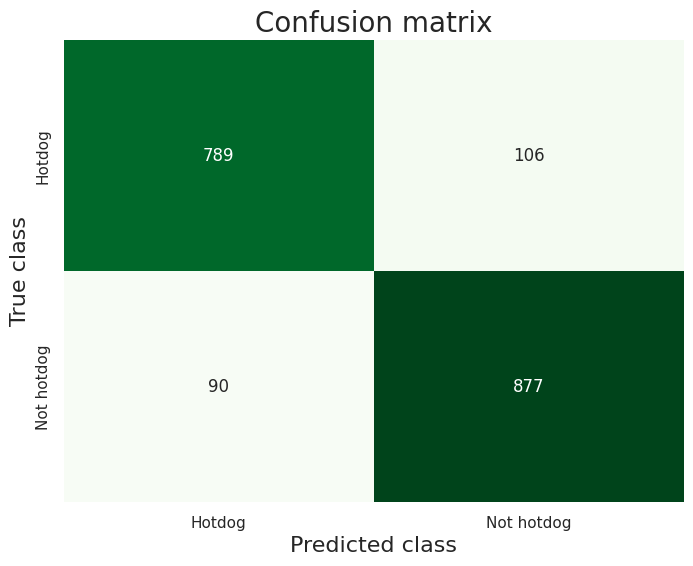

In [3]:
conf_mat_array = np.array([conf_mat["true_positive"], conf_mat["false_negative"], conf_mat["false_positive"], conf_mat["true_negative"]]).reshape(2,2)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(conf_mat_array, ax = ax, annot=True, fmt="d", cmap="Greens", xticklabels=["Hotdog", "Not hotdog"], yticklabels=["Hotdog", "Not hotdog"], cbar=False)
ax.set_xlabel("Predicted class", fontsize=16)
ax.set_ylabel("True class", fontsize=16)
ax.set_title("Confusion matrix", fontsize=20)
plt.show()

### Show examples from each class

Idea: Show output probabilities for each class

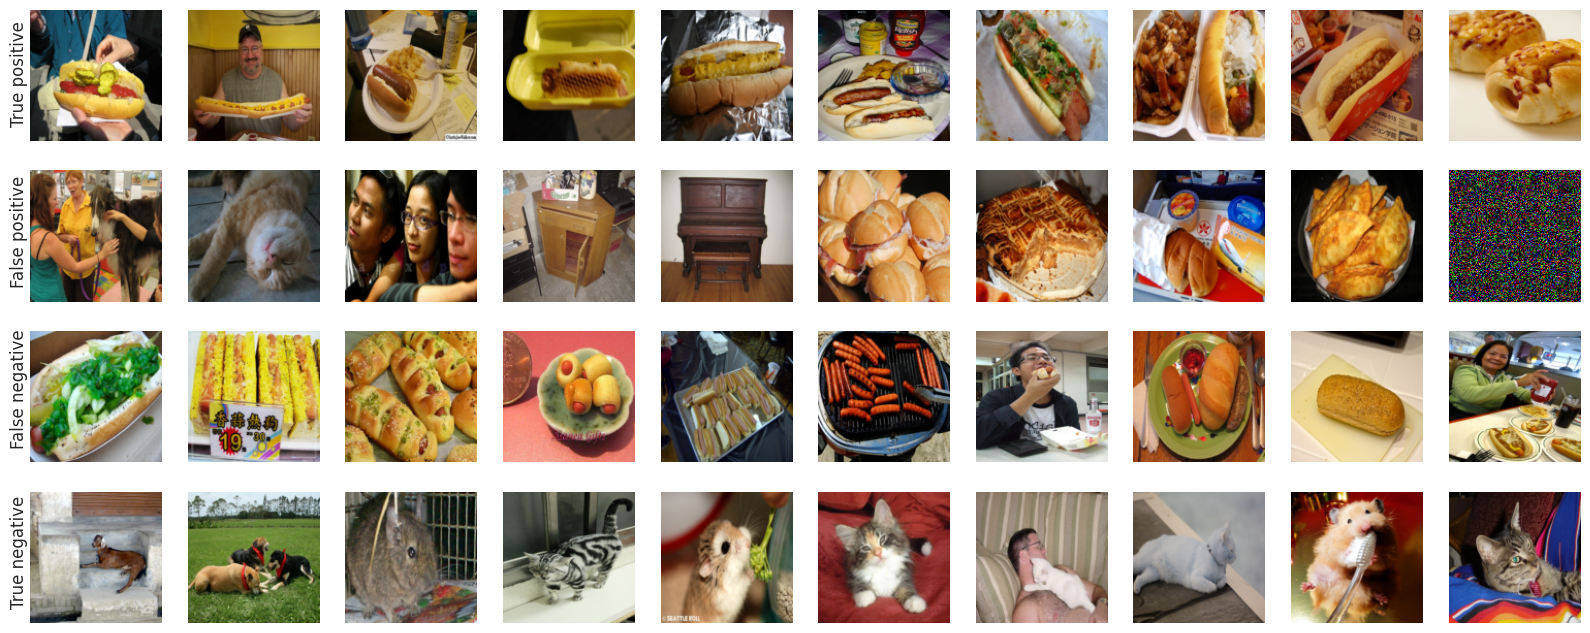

In [65]:
fig, axes = plt.subplots(4, 10, figsize=(20, 8))


tp_imgs = data_to_img_array(inverse_normalize(classifier.test_images["true_positive"]))
fp_imgs = data_to_img_array(inverse_normalize(classifier.test_images["false_positive"]))
fn_imgs = data_to_img_array(inverse_normalize(classifier.test_images["false_negative"]))
tn_imgs = data_to_img_array(inverse_normalize(classifier.test_images["true_negative"]))


for i in range(10):
    axes[0, i].imshow(tp_imgs[i])
    axes[1, i].imshow(fp_imgs[i])
    axes[2, i].imshow(fn_imgs[i])
    axes[3, i].imshow(tn_imgs[i])

for ax in axes.flat:
    ax.set_axis_off()

# Add row labels
axes[0,0].text(-20, 110, "True positive", fontsize=12, rotation=90)
axes[1,0].text(-20, 110, "False positive", fontsize=12, rotation=90)
axes[2,0].text(-20, 110, "False negative", fontsize=12, rotation=90)
axes[3,0].text(-20, 110, "True negative", fontsize=12, rotation=90)
    
plt.show()

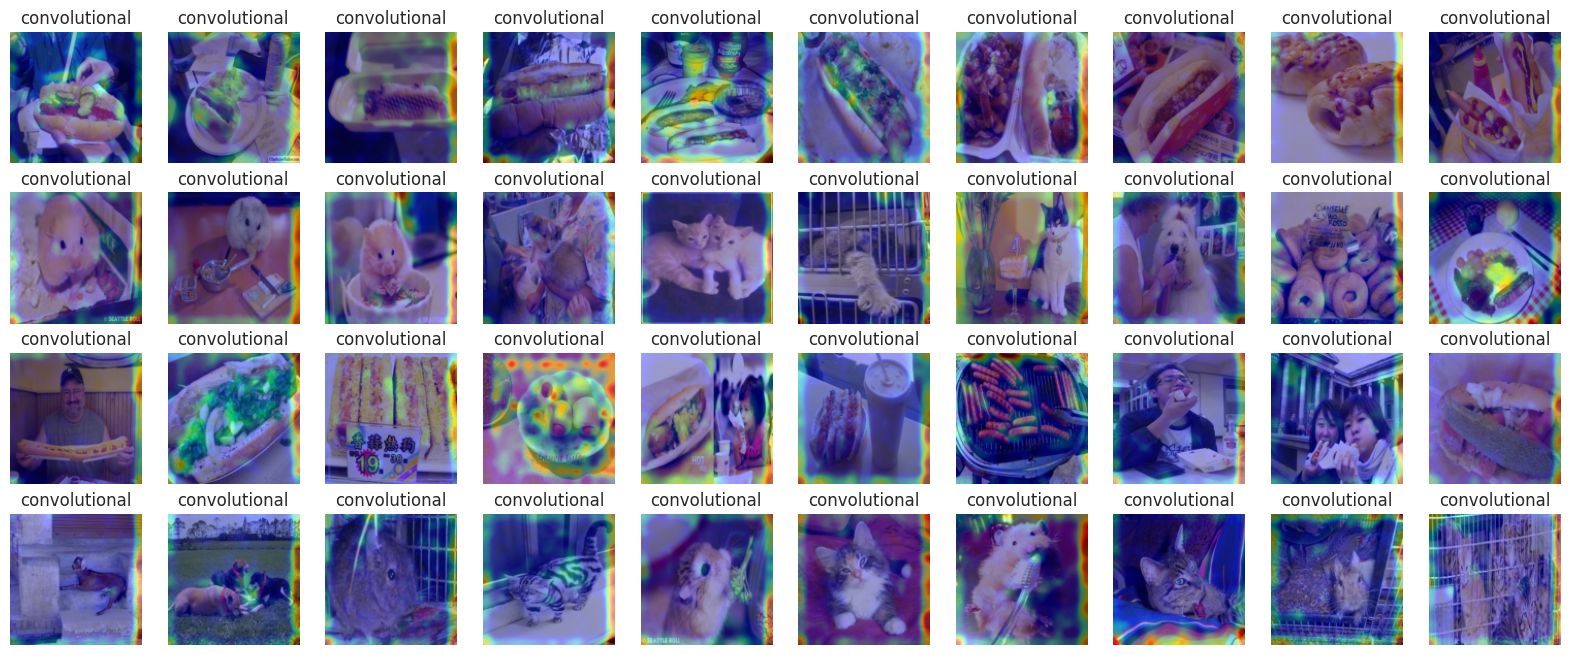

In [5]:
fig, axes = plt.subplots(4, 10, figsize=(20, 8))

for i in range(len(classifier.test_images["true_positive"])):
    classifier.saliency_map("true_positive", i, ax = axes[0, i])
    classifier.saliency_map("false_positive", i, ax = axes[1, i])
    classifier.saliency_map("false_negative", i, ax = axes[2, i])
    classifier.saliency_map("true_negative", i, ax = axes[3, i])
    


In [4]:
len(classifier.test_images["true_positive"])

10

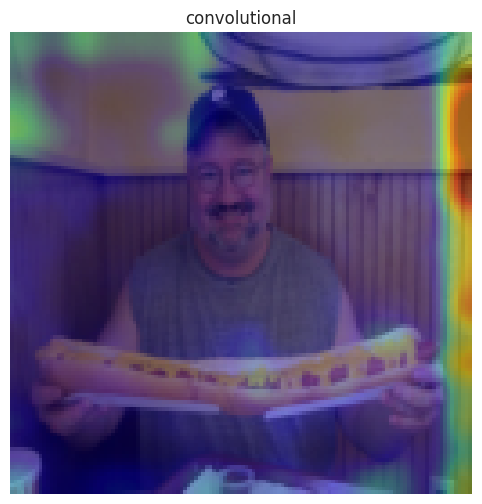

In [3]:
classifier.saliency_map("false_negative", 0)

In [9]:
inverse_normalize(classifier.test_images["true_positive"]).shape

torch.Size([10, 3, 128, 128])

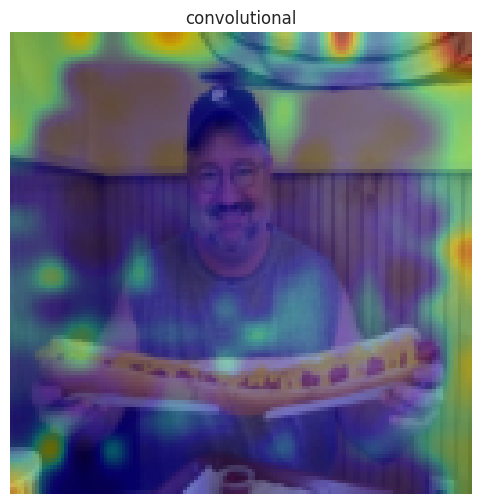

In [28]:
from torchcam.utils import overlay_mask
from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchvision.transforms.functional import normalize, resize, to_pil_image
from PIL import Image

def saliency_map(self, data, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
        
    # Set your CAM extractor
    cam_extractor = SmoothGradCAMpp(self.model, target_layer='convolutional') # layer 4 is the last conv layer of the model
    # cam_extractor = SmoothGradCAMpp(self.model, target_layer='fc')
    # get your input
    input_tensor = data[0].unsqueeze(0).to(self.device)

    out = self.model(input_tensor)
    # Retrieve the CAM by passing the class index and the model output
    cams = cam_extractor(out.squeeze(0).argmax().item(), out)
    
    # img = images[0]
    # img = tp_imgs[0]
    img = data_to_img_array(data)[0]
    for name, cam in zip(cam_extractor.target_names, cams):
        # result = overlay_mask(to_pil_image(img, mode = "RGB"), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
        result = overlay_mask(Image.fromarray(img.astype(np.uint8)), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.6)
        plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()
    cam_extractor.remove_hooks()
    
saliency_map(classifier, inverse_normalize(classifier.test_images["false_negative"]))

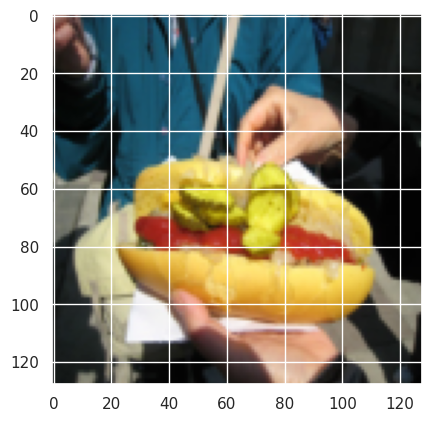

In [21]:
plt.imshow(data_to_img_array(inverse_normalize(classifier.test_images["true_positive"]))[0])

In [12]:
print(classifier.model)

Resnet18(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r